In [3]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.model_selection import GridSearchCV

In [4]:
data = pd.read_csv("./FIFA18_players_database/clean_data_normalized.csv")

In [5]:
data.head()

,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,...,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,Preferred Positions
0,0.513158,0.662651,0.479452,0.480000,0.518987,0.478873,0.4625,0.518519,0.476190,0.670588,...,0.507042,0.682927,0.172840,0.640000,0.617647,0.341463,0.662338,0.554217,0.6375,ST
1,0.671053,0.192771,0.630137,0.573333,0.620253,0.450704,0.5500,0.444444,0.607143,0.682353,...,0.605634,0.670732,0.185185,0.693333,0.838235,0.426829,0.623377,0.421687,0.7000,RM
2,0.671053,0.192771,0.630137,0.573333,0.620253,0.450704,0.5500,0.444444,0.607143,0.682353,...,0.605634,0.670732,0.185185,0.693333,0.838235,0.426829,0.623377,0.421687,0.7000,ST
3,0.263158,0.759036,0.410959,0.426667,0.746835,0.690141,0.7000,0.728395,0.750000,0.635294,...,0.746479,0.743902,0.617284,0.400000,0.705882,0.756098,0.883117,0.759036,0.6250,CDM
4,0.263158,0.759036,0.410959,0.426667,0.746835,0.690141,0.7000,0.728395,0.750000,0.635294,...,0.746479,0.743902,0.617284,0.400000,0.705882,0.756098,0.883117,0.759036,0.6250,CM


In [6]:
X = data.drop(columns=['Preferred Positions'])
y = data['Preferred Positions']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
svm_classifier = SVC(kernel='linear', class_weight='balanced')
svm_classifier.fit(X_train, y_train)
y_test_pred = svm_classifier.predict(X_test)
y_train_pred = svm_classifier.predict(X_train)

# Calculate test and train accuracy
acc_train = accuracy_score(y_train, y_train_pred)
acc_test = accuracy_score(y_test, y_test_pred)

# Print accuracy with 3 decimals
print(f"Accuracy of train: {acc_train:.3f}")
print(f"Accuracy of test: {acc_test:.3f}")

Accuracy of train: 0.396
Accuracy of test: 0.379


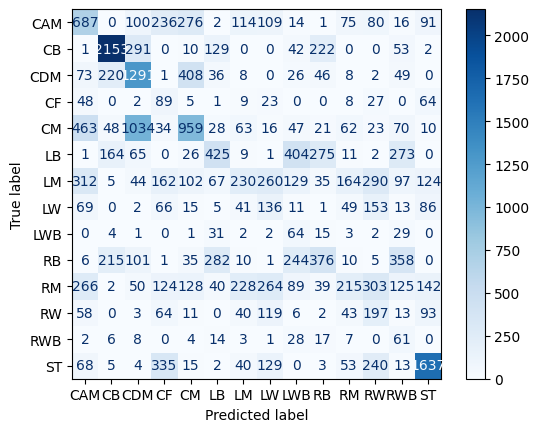

In [11]:
# Matrix of train
ConfusionMatrixDisplay.from_estimator(svm_classifier, X_train, y_train, cmap="Blues")

Notice the predictions, ex: CDM is predicted as both CDM and CM.

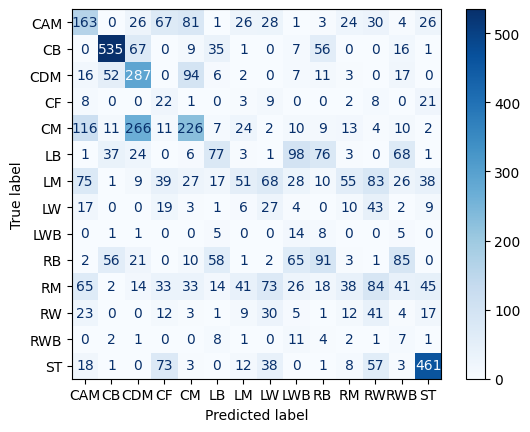

In [12]:
# Matrix of test
ConfusionMatrixDisplay.from_estimator(svm_classifier, X_test, y_test, cmap="Blues")

In [15]:
param_grid = {
    'C': [0.1, 1, 10, 100],           # Regularization parameter
    'kernel': ['linear', 'rbf'],      # Kernel type
    'gamma': ['scale', 'auto'],       # Kernel coefficient
    'class_weight': ['balanced', None]  # Class weights
}

grid_search = GridSearchCV(estimator = svm_classifier, param_grid=param_grid, scoring='accuracy', cv=3, verbose=1, n_jobs=-1)

# Perform grid search on training data
grid_search.fit(X_test, y_test)

# Best parameters and model
print("Best Hyperparameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

Fitting 3 folds for each of 32 candidates, totalling 96 fits
Best Hyperparameters: {'C': 100, 'class_weight': None, 'gamma': 'auto', 'kernel': 'rbf'}


Took too long to run grid search on the train data, so did it on the test data.

In [26]:
svm_classifierRBF = SVC(kernel='linear', C=100, gamma=0.03571429)

svm_classifierRBF.fit(X_train, y_train)
y_test_predRBF = svm_classifierRBF.predict(X_test)
y_train_predRBF = svm_classifierRBF.predict(X_train)

# Calculate test and train accuracy
acc_train = accuracy_score(y_train, y_train_predRBF)
acc_test = accuracy_score(y_test, y_test_predRBF)

# Print accuracy with 3 decimals
print(f"Accuracy of train: {acc_train:.3f}")
print(f"Accuracy of test: {acc_test:.3f}")


Accuracy of train: 0.468
Accuracy of test: 0.455


We got better result with RBF, and C=100.


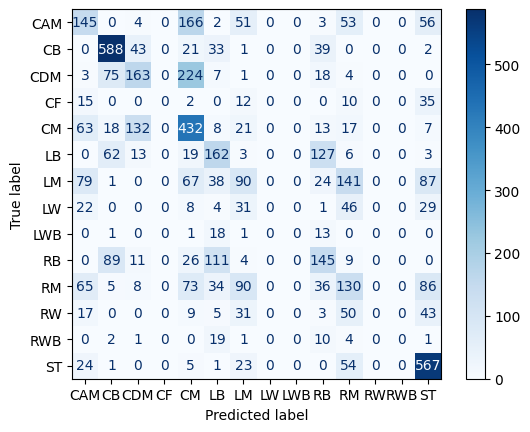

In [21]:
ConfusionMatrixDisplay.from_estimator(svm_classifierRBF, X_test, y_test, cmap="Blues")